- Training deep neural networks was traditionally challenging as the vanishing gradient meant that weights in layers close to the input layer were not updated in response to errors calculated on the training dataset
- An innovation and important milestone in the field of deep learning was greedy layer-wise pretraining that allowed very deep neural networks to be successfully trained, achieving then state-of-the-art performance

#### Greedy Layer-Wise Pretraining

Traditionally, training deep neural networks with many layers was challenging.

As the number of hidden layers is increased, the amount of error information propagated back to earlier layers is dramatically reduced. This means that weights in hidden layers close to the output layer are updated normally, whereas weights in hidden layers close to the input layer are updated minimally or not at all. Generally, this problem prevented the training of very deep neural networks and was referred to as the vanishing gradient problem.

An important milestone in the resurgence of neural networking that initially allowed the development of deeper neural network models was the technique of greedy layer-wise pretraining, often simply referred to as “pretraining.”

Pretraining involves successively adding a new hidden layer to a model and refitting, allowing the newly added model to learn the inputs from the existing hidden layer, often while keeping the weights for the existing hidden layers fixed. This gives the technique the name “layer-wise” as the model is trained one layer at a time

The technique is referred to as “greedy” because the piecewise or layer-wise approach to solving the harder problem of training a deep network. As an optimization process, dividing the training process into a succession of layer-wise training processes is seen as a greedy shortcut that likely leads to an aggregate of locally optimal solutions, a shortcut to a good enough global solution

Greedy algorithms break a problem into many components, then solve for the optimal version of each component in isolation. Unfortunately, combining the individually optimal components is not guaranteed to yield an optimal complete solution.Builds on the premise that training a shallow network is easier than training a deep one, which seems to have been validated in several contexts

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


> layers=2, train=0.824, test=0.832
> layers=3, train=0.840, test=0.822
> layers=4, train=0.838, test=0.822
> layers=5, train=0.836, test=0.820
> layers=6, train=0.838, test=0.820
> layers=7, train=0.832, test=0.818
> layers=8, train=0.830, test=0.816
> layers=9, train=0.830, test=0.824
> layers=10, train=0.836, test=0.824
> layers=11, train=0.838, test=0.818
> layers=12, train=0.832, test=0.818


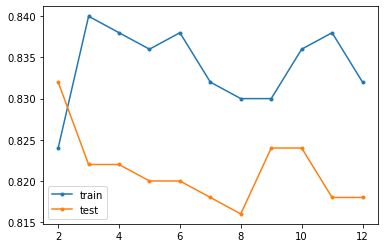

In [1]:
# supervised greedy layer-wise pretraining for blobs classification problem
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# prepare the dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, testX, trainy, testy

# define and fit the base model
def get_base_model(trainX, trainy):
    # define model
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=100, verbose=0)
    return model

# evaluate a fit model
def evaluate_model(model, trainX, testX, trainy, testy):
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return train_acc, test_acc

# add one new layer and re-train only the new layer
def add_layer(model, trainX, trainy):
    # remember the current output layer
    output_layer = model.layers[-1]
    # remove the output layer
    model.pop()
    # mark all remaining layers as non-trainable
    for layer in model.layers:
        layer.trainable = False
    # add a new hidden layer
    model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
    # re-add the output layer
    model.add(output_layer)
    # fit model
    model.fit(trainX, trainy, epochs=100, verbose=0)

# prepare data
trainX, testX, trainy, testy = prepare_data()
# get the base model
model = get_base_model(trainX, trainy)
# evaluate the base model
scores = dict()
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[len(model.layers)] = (train_acc, test_acc)
# add layers and evaluate the updated model
n_layers = 10
for i in range(n_layers):
    # add layer
    add_layer(model, trainX, trainy)
    # evaluate model
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
    # store scores for plotting
    scores[len(model.layers)] = (train_acc, test_acc)
# plot number of added layers vs accuracy
pyplot.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
pyplot.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
pyplot.legend()
pyplot.show()